In [4]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

In [5]:
# Download training dataset
dataset = MNIST(root='data/', download=True)
len(dataset)

60000

In [6]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [7]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

# Ploting with Matplotlib

In [8]:
import matplotlib.pyplot as plt
#%matplotlib inline

In [9]:
image, label = dataset[0]


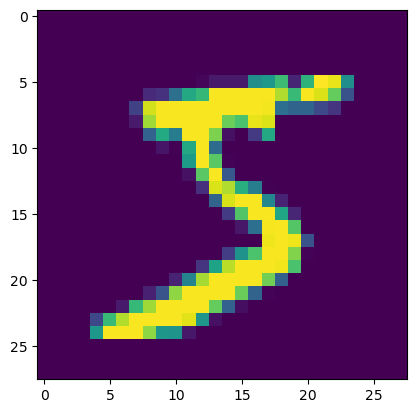

In [10]:
plt.imshow(image)

Label: 5


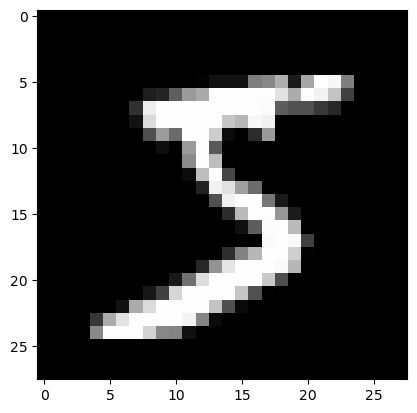

In [11]:
plt.imshow(image, cmap='gray')
print('Label:', label)

In [12]:
import torchvision.transforms as transforms

In [13]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

In [14]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


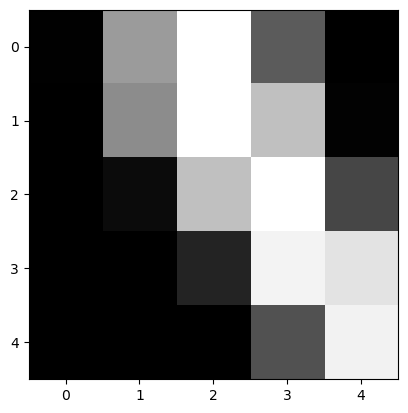

In [15]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

In [16]:
from torch.utils.data import random_split
train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [17]:
from torch.utils.data import DataLoader
batch_size = 128
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

## Logistic

In [18]:
import torch.nn as nn
input_size = 28*28
num_classes = 10
# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [19]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0112,  0.0343,  0.0143, -0.0065, -0.0291, -0.0254, -0.0016,  0.0026,
        -0.0060, -0.0244], requires_grad=True)

In [22]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    images2=images.reshape(128, 784)
    outputs = model(images2)
    print(outputs)
    break

tensor([1, 1, 5, 0, 1, 7, 2, 3, 8, 0, 1, 1, 1, 2, 0, 3, 0, 1, 4, 9, 1, 0, 1, 0,
        1, 2, 6, 8, 0, 4, 8, 9, 7, 4, 2, 9, 2, 3, 5, 7, 5, 6, 9, 8, 7, 1, 9, 1,
        9, 4, 0, 4, 4, 7, 4, 8, 5, 7, 3, 8, 6, 4, 1, 1, 3, 3, 1, 7, 2, 0, 9, 6,
        2, 4, 2, 7, 7, 1, 1, 9, 0, 3, 0, 0, 6, 9, 0, 8, 6, 7, 4, 0, 6, 3, 1, 0,
        3, 5, 3, 8, 5, 1, 1, 3, 6, 3, 9, 3, 2, 5, 4, 6, 9, 8, 6, 7, 1, 5, 1, 9,
        0, 8, 6, 6, 1, 3, 1, 7])
torch.Size([128, 1, 28, 28])
tensor([[ 0.0019,  0.1095,  0.1682,  ...,  0.3518,  0.2998,  0.1975],
        [ 0.1975, -0.1160,  0.2047,  ...,  0.1108,  0.0930,  0.0883],
        [ 0.1826,  0.0622, -0.4465,  ..., -0.1029, -0.1280,  0.1024],
        ...,
        [ 0.0095,  0.1474, -0.0898,  ..., -0.0237,  0.2163,  0.1578],
        [ 0.3329, -0.0796,  0.0893,  ...,  0.1439,  0.0681,  0.0850],
        [-0.0949,  0.2168,  0.1545,  ..., -0.0227,  0.0710,  0.2349]],
       grad_fn=<AddmmBackward0>)


In [23]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [24]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0048,  0.0162, -0.0238,  ...,  0.0083,  0.0165,  0.0068],
         [-0.0044, -0.0311, -0.0032,  ...,  0.0009, -0.0004,  0.0032],
         [-0.0293, -0.0288,  0.0341,  ..., -0.0184,  0.0323, -0.0119],
         ...,
         [-0.0321, -0.0258,  0.0287,  ..., -0.0047,  0.0147, -0.0001],
         [-0.0335,  0.0092, -0.0103,  ..., -0.0257,  0.0193,  0.0010],
         [-0.0332, -0.0181, -0.0016,  ..., -0.0260, -0.0291, -0.0355]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0054,  0.0290,  0.0275, -0.0245,  0.0279, -0.0346, -0.0247,  0.0193,
          0.0337,  0.0060], requires_grad=True)]

In [25]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0048,  0.0162, -0.0238,  ...,  0.0083,  0.0165,  0.0068],
         [-0.0044, -0.0311, -0.0032,  ...,  0.0009, -0.0004,  0.0032],
         [-0.0293, -0.0288,  0.0341,  ..., -0.0184,  0.0323, -0.0119],
         ...,
         [-0.0321, -0.0258,  0.0287,  ..., -0.0047,  0.0147, -0.0001],
         [-0.0335,  0.0092, -0.0103,  ..., -0.0257,  0.0193,  0.0010],
         [-0.0332, -0.0181, -0.0016,  ..., -0.0260, -0.0291, -0.0355]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0054,  0.0290,  0.0275, -0.0245,  0.0279, -0.0346, -0.0247,  0.0193,
          0.0337,  0.0060], requires_grad=True)]

In [26]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.0644, -0.0408, -0.0324,  0.2520,  0.2990,  0.1958, -0.0999, -0.0741,
         -0.0641,  0.0479],
        [ 0.1853, -0.0934,  0.0295, -0.1043,  0.3185,  0.1613, -0.0962,  0.1611,
         -0.0300, -0.3227]])


In [27]:
import torch.nn.functional as F

In [28]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1000, 0.0900, 0.0908, 0.1206, 0.1264, 0.1140, 0.0848, 0.0871, 0.0879,
         0.0983],
        [0.1160, 0.0878, 0.0993, 0.0869, 0.1326, 0.1133, 0.0876, 0.1133, 0.0936,
         0.0698]])
Sum:  1.0


In [29]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([4, 4, 4, 8, 2, 2, 0, 8, 0, 1, 4, 4, 8, 0, 8, 5, 6, 5, 8, 4, 4, 0, 4, 3,
        2, 4, 4, 1, 4, 5, 0, 5, 5, 8, 4, 4, 7, 0, 2, 4, 3, 0, 5, 5, 3, 4, 4, 2,
        5, 0, 1, 2, 2, 8, 5, 2, 5, 8, 5, 0, 4, 8, 8, 8, 2, 4, 5, 0, 4, 7, 7, 7,
        9, 3, 1, 7, 9, 5, 2, 7, 2, 4, 5, 4, 4, 2, 2, 5, 5, 4, 2, 4, 2, 4, 5, 2,
        3, 7, 7, 0, 4, 7, 7, 2, 4, 7, 5, 8, 0, 2, 7, 7, 2, 3, 8, 1, 4, 5, 0, 5,
        4, 8, 4, 7, 0, 5, 7, 0])
tensor([0.1264, 0.1326, 0.1254, 0.1330, 0.1256, 0.1286, 0.1281, 0.1427, 0.1463,
        0.1357, 0.1546, 0.1148, 0.1201, 0.1251, 0.1240, 0.1191, 0.1211, 0.1433,
        0.1230, 0.1327, 0.1248, 0.1245, 0.1100, 0.1173, 0.1280, 0.1279, 0.1269,
        0.1139, 0.1276, 0.1246, 0.1152, 0.1148, 0.1202, 0.1393, 0.1277, 0.1194,
        0.1530, 0.1264, 0.1312, 0.1159, 0.1218, 0.1311, 0.1352, 0.1374, 0.1234,
        0.1277, 0.1353, 0.1188, 0.1333, 0.1184, 0.1273, 0.1157, 0.1325, 0.1305,
        0.1276, 0.1123, 0.1163, 0.1277, 0.1268, 0.1175, 0.1206, 0.1204, 0.1224,
       

# Evalaution Metric and Loss Function

In [ ]:
outputs[:2]
torch.sum(preds == labels)

In [30]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [31]:
accuracy(outputs, labels)

tensor(0.0781)

In [32]:
loss_fn = F.cross_entropy

In [33]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3151, grad_fn=<NllLossBackward0>)


for epoch in range(num_epochs):
    # Training phase
    for batch in train_loader:
        # Generate predictions
        # Calculate loss
        # Compute gradients
        # Update weights
        # Reset gradients
    
    # Validation phase
    for batch in val_loader:
        # Generate predictions
        # Calculate loss
        # Calculate metrics (accuracy etc.)
    # Calculate average validation loss & metrics
    
    # Log epoch, loss & metrics for inspection

In [34]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [35]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [36]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [37]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3214361667633057, 'val_acc': 0.11046281456947327}

In [38]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9509, val_acc: 0.6270
Epoch [1], val_loss: 1.6802, val_acc: 0.7169
Epoch [2], val_loss: 1.4775, val_acc: 0.7539
Epoch [3], val_loss: 1.3241, val_acc: 0.7789
Epoch [4], val_loss: 1.2060, val_acc: 0.7939


In [39]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1132, val_acc: 0.8070
Epoch [1], val_loss: 1.0387, val_acc: 0.8182
Epoch [2], val_loss: 0.9778, val_acc: 0.8260
Epoch [3], val_loss: 0.9271, val_acc: 0.8307
Epoch [4], val_loss: 0.8843, val_acc: 0.8334


In [43]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.6489, val_acc: 0.8608
Epoch [1], val_loss: 0.6376, val_acc: 0.8629
Epoch [2], val_loss: 0.6272, val_acc: 0.8646
Epoch [3], val_loss: 0.6174, val_acc: 0.8661
Epoch [4], val_loss: 0.6083, val_acc: 0.8668


In [40]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8477, val_acc: 0.8381
Epoch [1], val_loss: 0.8160, val_acc: 0.8415
Epoch [2], val_loss: 0.7882, val_acc: 0.8440
Epoch [3], val_loss: 0.7637, val_acc: 0.8453
Epoch [4], val_loss: 0.7420, val_acc: 0.8485


In [41]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7225, val_acc: 0.8509
Epoch [1], val_loss: 0.7049, val_acc: 0.8531
Epoch [2], val_loss: 0.6889, val_acc: 0.8547
Epoch [3], val_loss: 0.6744, val_acc: 0.8571
Epoch [4], val_loss: 0.6611, val_acc: 0.8589


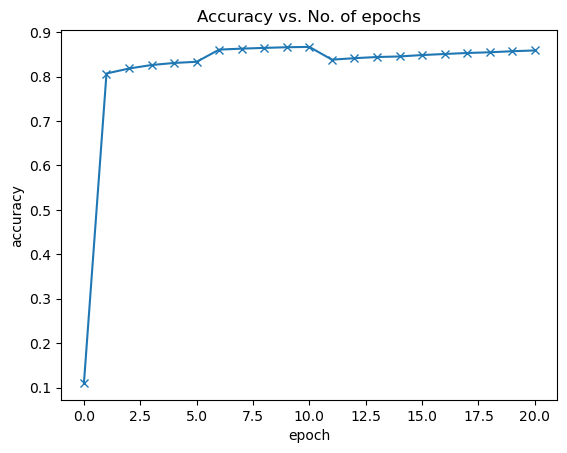

In [44]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

# Testing iNdividual

In [45]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


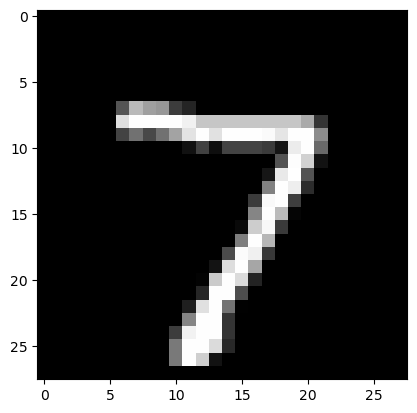

In [46]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [47]:
# Overall Loss
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.5873834490776062, 'val_acc': 0.867480456829071}

In [48]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0205, -0.0347,  0.0178,  ..., -0.0238, -0.0198,  0.0213],
                      [ 0.0200, -0.0167, -0.0050,  ...,  0.0347, -0.0169, -0.0062],
                      [ 0.0008, -0.0032,  0.0280,  ...,  0.0026, -0.0139, -0.0246],
                      ...,
                      [-0.0046,  0.0313,  0.0228,  ...,  0.0212, -0.0007, -0.0239],
                      [ 0.0212,  0.0348,  0.0046,  ..., -0.0029, -0.0087,  0.0189],
                      [-0.0209,  0.0235, -0.0271,  ..., -0.0272, -0.0032,  0.0249]])),
             ('linear.bias',
              tensor([-0.0333,  0.1157,  0.0034, -0.0440,  0.0554,  0.0386, -0.0091,  0.0479,
                      -0.1204,  0.0214]))])

In [ ]:
torch.save(model.state_dict(), 'mnist-logistic.pth')
model2.load_state_dict(torch.load('mnist-logistic.pth'))